In [1]:
import pandas as pd
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.ticker as ticker

import math

In [3]:
graph_names=["facebook","oregon1","oregon2","45100_sparse_graph","4039_dense_graph"]

columns=[str(x)+"_constr" for x in range(1,21)]+[str(x)+"_algo" for x in range(1,21)]+[str(x)+"_total_seq_const" for x in range(1,21)]

data=pd.DataFrame(
    columns=["name"]+columns
)

for graph in graph_names:
    
    row_construction = pd.read_csv('results/'+graph+'_construction.txt', sep=" ", header=None).dropna(axis=1)
    row_algo = pd.read_csv('results/'+graph+'_algo.txt', sep=" ", header=None).dropna(axis=1)
    row_total = pd.read_csv('results/'+graph+'_total_seq_const.txt', sep=" ", header=None).dropna(axis=1)
    
    row=pd.concat([row_construction,row_algo,row_total],axis=1)
    
    row.columns=columns
    row["name"]=graph
    
    data=pd.concat([data,row])
    
data.reset_index(inplace=True,drop=True)

pd.set_option('display.max_columns', 500)

data

,name,1_constr,2_constr,3_constr,4_constr,5_constr,6_constr,7_constr,8_constr,9_constr,10_constr,11_constr,12_constr,13_constr,14_constr,15_constr,16_constr,17_constr,18_constr,19_constr,20_constr,1_algo,2_algo,3_algo,4_algo,5_algo,6_algo,7_algo,8_algo,9_algo,10_algo,11_algo,12_algo,13_algo,14_algo,15_algo,16_algo,17_algo,18_algo,19_algo,20_algo,1_total_seq_const,2_total_seq_const,3_total_seq_const,4_total_seq_const,5_total_seq_const,6_total_seq_const,7_total_seq_const,8_total_seq_const,9_total_seq_const,10_total_seq_const,11_total_seq_const,12_total_seq_const,13_total_seq_const,14_total_seq_const,15_total_seq_const,16_total_seq_const,17_total_seq_const,18_total_seq_const,19_total_seq_const,20_total_seq_const
0,facebook,3,5,4,3,3,3,3,3,3,3,2,3,3,3,3,3,2,3,3,2,60,32,21,16,19,16,14,12,17,16,15,15,14,14,13,13,14,14,14,14,63,35,24,20,22,19,16,15,20,19,18,18,17,17,17,16,18,17,17,17
1,oregon1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,oregon2,2,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,9,5,3,2,3,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,11,7,5,4,5,4,4,4,5,4,4,4,4,4,4,4,4,4,4,4
3,45100_sparse_graph,75,97,74,68,70,55,47,44,44,48,51,53,56,55,58,57,58,60,60,60,432,213,149,125,105,91,85,91,97,96,92,89,88,89,88,88,89,88,89,88,507,286,228,201,182,165,159,168,176,166,167,168,165,168,168,162,165,165,167,167
4,4039_dense_graph,498,2922,5346,6296,6389,6280,6452,6517,5015,4515,4343,4163,4215,4321,4445,4496,4655,4653,4771,4850,55294,28007,20773,17202,19635,18409,18041,16669,17780,18435,18744,18821,18975,18992,18992,18786,19022,19145,19206,19249,55793,28109,20676,17212,19961,18437,17682,16311,17696,18708,19046,19212,19457,19495,19451,19223,19572,19689,19763,19811


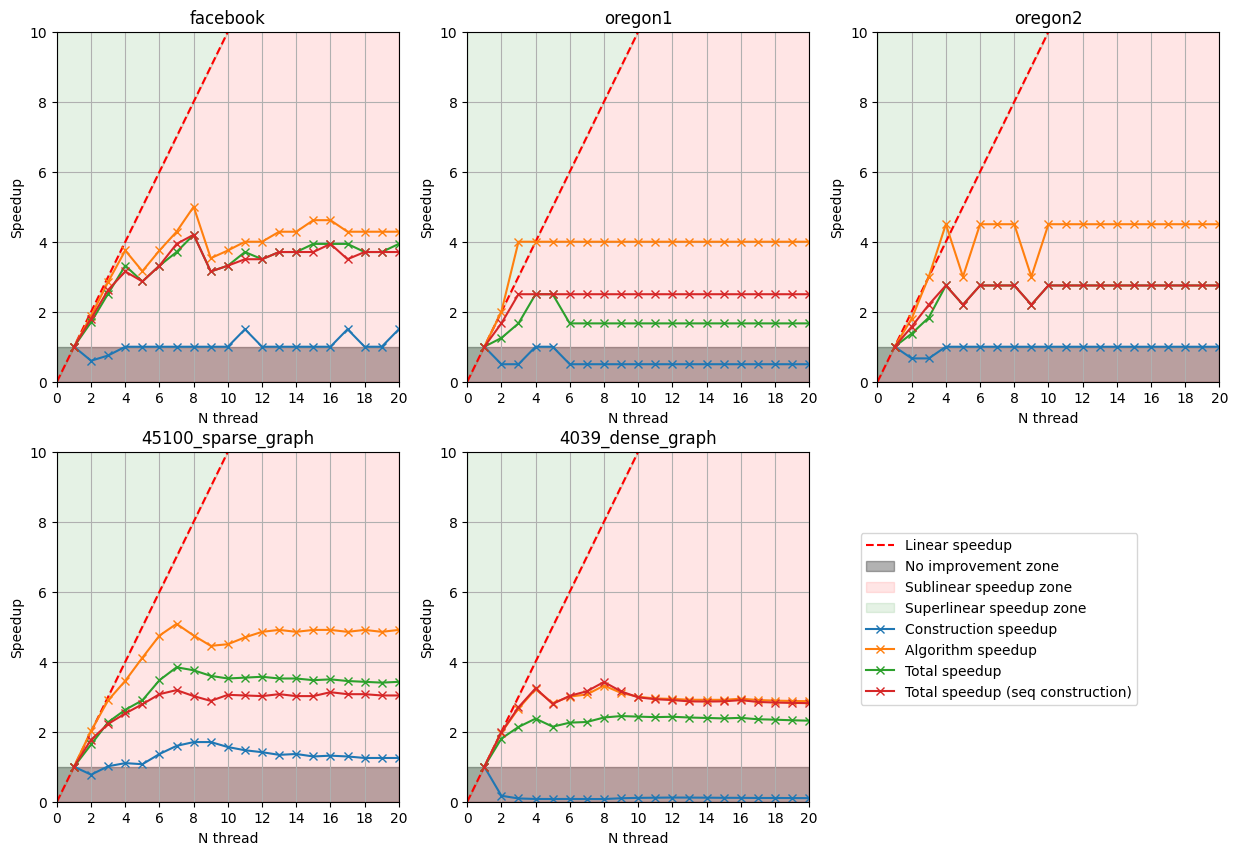

In [4]:
def plot_(max_thread:int,max_speedup:int):

    fig,axs=plt.subplots(math.ceil(data.shape[0]/3),3,figsize=(15,math.ceil(data.shape[0]/3)*5))
    
    axs=[item for sublist in axs for item in sublist]
    
    for index,row in data.iterrows():
        
        axs[index].set_xlabel("N thread")
        axs[index].set_ylabel("Speedup")
        
        axs[index].set_xlim(0,max_thread)
        axs[index].set_ylim(0,max_speedup)
        
        axs[index].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        
        axs[index].set_title(row["name"])
        
        line = mlines.Line2D([0, max_speedup], [0, max_speedup], color='red',linestyle="dashed",label="Linear speedup")
        axs[index].add_line(line)
        
        axs[index].fill_between([x for x in range(0,max_thread+1)],
                                [1]*(max_thread+1),
                                alpha=0.3,color="black",label="No improvement zone")
        
        axs[index].fill_between([x for x in range(0,max_thread+1)],
                                [x for x in range(0,max_thread+1)],
                                alpha=0.1,color="red",label="Sublinear speedup zone")
        
        axs[index].fill_between([x for x in range(0,max_thread+1)],
                                [x for x in range(0,max_thread+1)],
                                max_thread, alpha=0.1,color="green", label="Superlinear speedup zone")
        
        #construction speedup
        axs[index].plot([x for x in range(1,max_thread+1)],
                           [row["1_constr"]/row[str(x)+"_constr"] for x in range(1,max_thread+1)],
                           '-x',
                           label="Construction speedup")
        
        #algorithm speedup
        axs[index].plot([x for x in range(1,max_thread+1)],
                           [row["1_algo"]/row[str(x)+"_algo"] for x in range(1,max_thread+1)],
                           '-x',
                           label="Algorithm speedup")
        
        #total speedup
        axs[index].plot([x for x in range(1,max_thread+1)],
                           [(row["1_algo"]+row["1_constr"])/(row[str(x)+"_algo"]+row[str(x)+"_constr"]) for x in range(1,max_thread+1)],
                           '-x',
                           label="Total speedup")
        
        #total speedup (seq construction)
        axs[index].plot([x for x in range(1,max_thread+1)],
                           [(row["1_total_seq_const"])/(row[str(x)+"_total_seq_const"]) for x in range(1,max_thread+1)],
                           '-x',
                           label="Total speedup (seq construction)")
        axs[index].grid()
        
        handles, labels = axs[index].get_legend_handles_labels()
    
    fig.legend(handles, labels, loc="lower right", bbox_to_anchor=(0.85, 0.20))
    
    for index in range(data.shape[0],len(axs)):
        axs[index].remove()

plot_(20,10)